# Logistic regression model for the Portuguese banking dataset

Dataset = [Portuguese banking dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing)                              

Model = Logistic Regression                                                                                            

Description = The dataset contains information related to direct marketing campaigns of a Portuguese banking institution, and the goal is to predict if the client will subscribe a term deposit.

## Data Understanding

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('C:\\Users\\Lakshmi\\Downloads\\Archive\\bank-additional-full.csv', delimiter=';')

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
def explain(attr):
    x = np.unique(np.array(data[attr]),return_counts=True)
    print(f"{attr}: ",len(x[0]),x[0])
    print("Probablities: ",x[1]/np.sum(x[1]))

### We will be using age,job,marital,education,default,housing,loan and contact

In [23]:
print("Age")
explain('age')

Age
age:  78 [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 91 92 94 95 98]
Probablities:  [1.21394581e-04 6.79809653e-04 1.01971448e-03 1.57812955e-03
 2.47644945e-03 3.32621152e-03 5.48703506e-03 1.12411382e-02
 1.45187919e-02 1.69466835e-02 2.06613577e-02 2.43031951e-02
 3.52772652e-02 4.16140623e-02 4.72710498e-02 4.48188793e-02
 4.45032534e-02 4.23667088e-02 4.27066136e-02 4.32164708e-02
 3.58114014e-02 3.41604351e-02 3.47674080e-02 2.81878217e-02
 3.10284549e-02 2.77265223e-02 2.56142566e-02 2.45459843e-02
 2.67796446e-02 2.50072837e-02 2.25308342e-02 2.37690589e-02
 2.03700107e-02 2.12440517e-02 1.83063028e-02 1.89132757e-02
 1.77964456e-02 1.66067787e-02 1.57327377e-02 1.70923570e-02
 1.56841799e-02 1.39846557e-02 1.12411382e-02 6.87093328e-03
 1.77236088e-03 1.50529280e-03 1.33534039e-03 1.38389822e-03
 

In [24]:
print("Job")
explain('job')

Job
job:  12 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
Probablities:  [0.25303486 0.22467709 0.0353501  0.02573565 0.07099155 0.04175974
 0.03450034 0.09636302 0.02124405 0.16371273 0.02461882 0.00801204]


In [25]:
print('Marital')
explain('marital')

Marital
marital:  4 ['divorced' 'married' 'single' 'unknown']
Probablities:  [0.11197436 0.60522482 0.2808585  0.00194231]


In [26]:
print('Education')
explain('education')

Education
education:  8 ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
Probablities:  [0.10138875 0.05564728 0.14676605 0.23101389 0.00043702 0.12729436
 0.29542585 0.0420268 ]


In [27]:
print('Default')
explain('default')

Default
default:  3 ['no' 'unknown' 'yes']
Probablities:  [7.91201321e-01 2.08725842e-01 7.28367486e-05]


In [28]:
print('Housing')
explain('housing')

Housing
housing:  3 ['no' 'unknown' 'yes']
Probablities:  [0.45212198 0.02403613 0.5238419 ]


In [29]:
print('Loan')
explain('loan')

Loan
loan:  3 ['no' 'unknown' 'yes']
Probablities:  [0.8242692  0.02403613 0.15169467]


In [30]:
print('Contact')
explain('contact')

Contact
contact:  2 ['cellular' 'telephone']
Probablities:  [0.63474798 0.36525202]


## Data Visualize

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

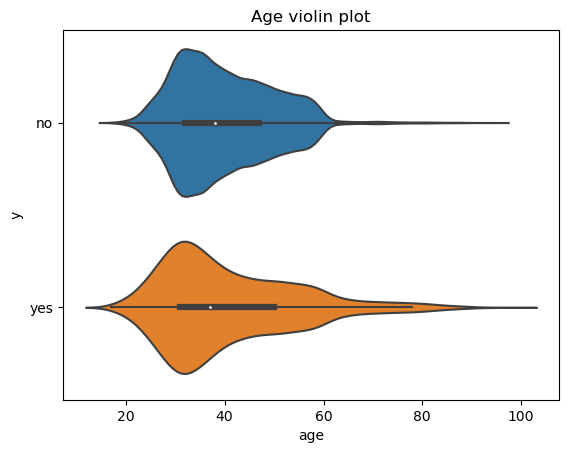

In [11]:
plt.figure()
sns.violinplot(x='age', y='y', data=data).set_title('Age violin plot')
plt.show()

In [12]:
def plotHist(attr):
    sns.histplot(data=data,x=attr,hue='y',multiple="stack")
    plt.xticks(rotation=90)

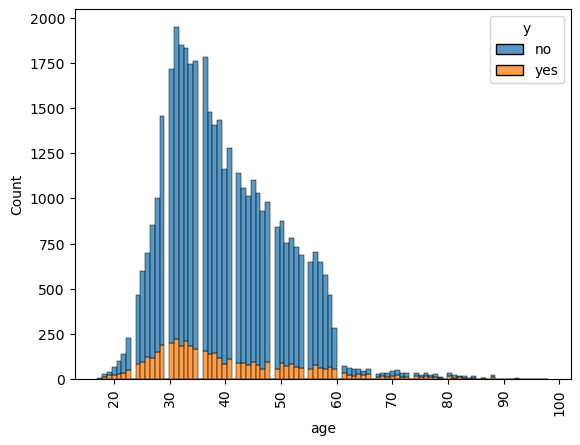

In [13]:
plotHist('age')

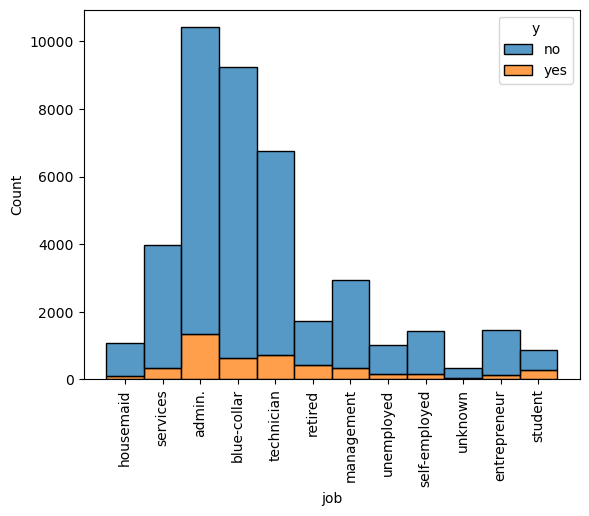

In [14]:
plotHist('job')

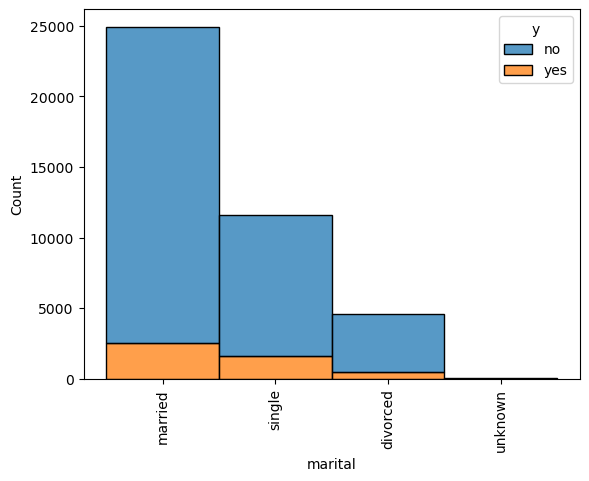

In [15]:
plotHist('marital')

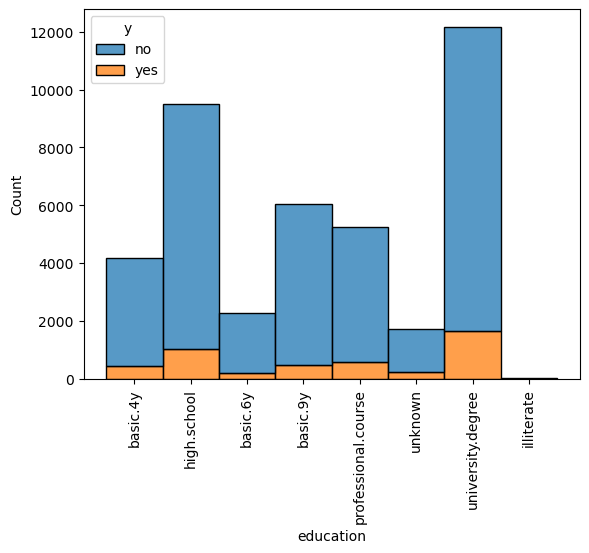

In [16]:
plotHist('education')

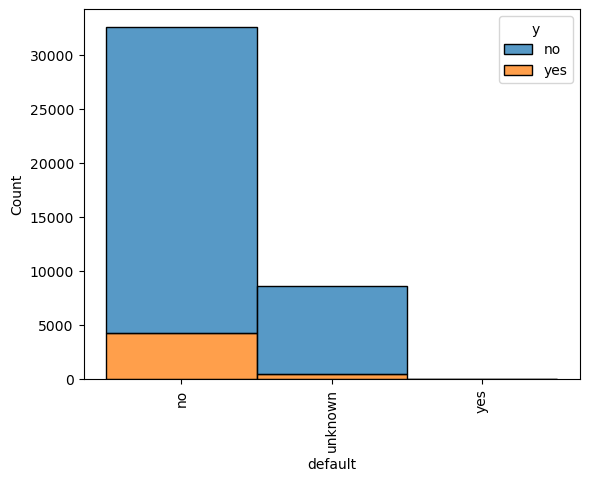

In [17]:
plotHist('default')

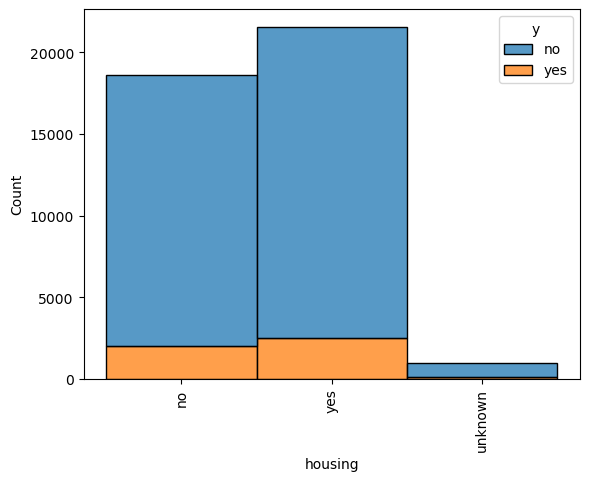

In [18]:
plotHist('housing')

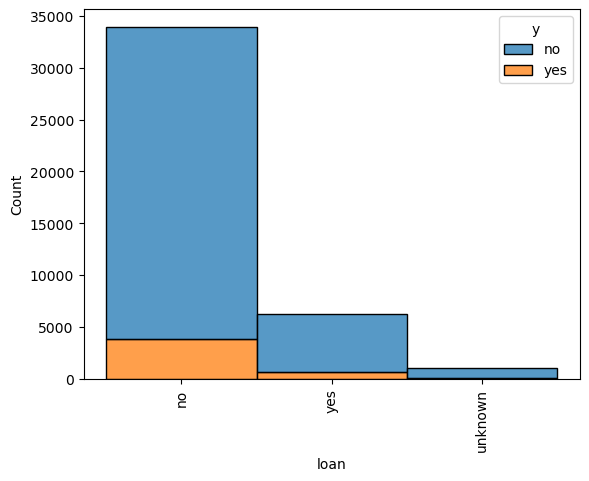

In [19]:
plotHist('loan')

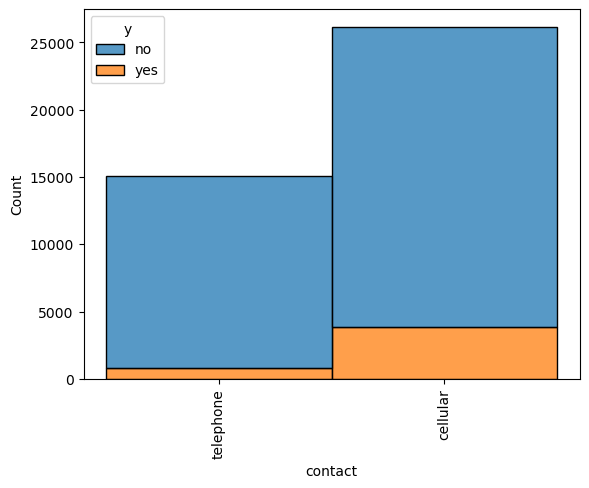

In [20]:
plotHist('contact')

# Featuring

### Handling categorical data

#### Extract Numerical & Categorical Features

In [36]:
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtype=='object']
    num_col=[col for col in df.columns if df[col].dtype!='object']
    return cat_col,num_col

In [39]:
cat_col,num_col=extract_cat_num(data)

In [41]:
num_col

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [40]:
cat_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [51]:
feat_data = data[["age","job","marital","education","default","housing","loan","contact",'poutcome','y']]
outcome = data[['y']]

In [52]:
jobs = pd.get_dummies(data['job']).rename(columns = {'unknown':'junk'})
contact = pd.get_dummies(feat_data["contact"]).rename(columns = {'unknown':'cunk'})
education = pd.get_dummies(feat_data['education']).rename(columns = {'unknown':'eunk'})
marital =  pd.get_dummies(feat_data['marital']).rename(columns = {'unknown':'munk'})
poutcome =  pd.get_dummies(feat_data['poutcome'])

In [53]:
feat_data.drop(['job','marital','education','contact','y','poutcome'], axis = 1, inplace = True)
feat_data.replace(['yes','no','unknown'],[1,-1,0],inplace=True)

C:\Users\Lakshmi\AppData\Local\Temp\ipykernel_10040\654847945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_data.drop(['job','marital','education','contact','y','poutcome'], axis = 1, inplace = True)
C:\Users\Lakshmi\AppData\Local\Temp\ipykernel_10040\654847945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_data.replace(['yes','no','unknown'],[1,-1,0],inplace=True)


In [54]:
feat_data.head()

,age,default,housing,loan
0,56,-1,-1,-1
1,57,0,-1,-1
2,37,-1,1,-1
3,40,-1,-1,-1
4,56,-1,-1,1


In [55]:
out = feat_data.join(jobs)
out = out.join(marital)
out = out.join(education)
out = out.join(contact)
out = out.join(poutcome)

In [56]:
out.columns

Index(['age', 'default', 'housing', 'loan', 'admin.', 'blue-collar',
       'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed',
       'services', 'student', 'technician', 'unemployed', 'junk', 'divorced',
       'married', 'single', 'munk', 'basic.4y', 'basic.6y', 'basic.9y',
       'high.school', 'illiterate', 'professional.course', 'university.degree',
       'eunk', 'cellular', 'telephone', 'failure', 'nonexistent', 'success'],
      dtype='object')

In [57]:
out

,age,default,housing,loan,admin.,blue-collar,entrepreneur,housemaid,management,retired,...,high.school,illiterate,professional.course,university.degree,eunk,cellular,telephone,failure,nonexistent,success
0,56,-1,-1,-1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,57,0,-1,-1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
2,37,-1,1,-1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
3,40,-1,-1,-1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,56,-1,-1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,-1,1,-1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
41184,46,-1,-1,-1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
41185,56,-1,1,-1,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
41186,44,-1,-1,-1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


## Stratified sampling

In [58]:
outcome.replace(['yes','no'],[1,0],inplace=True)

C:\Users\Lakshmi\AppData\Local\Temp\ipykernel_10040\3732258303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outcome.replace(['yes','no'],[1,0],inplace=True)


In [59]:
np.unique(np.array(outcome['y']),return_counts=True)

(array([0, 1], dtype=int64), array([36548,  4640], dtype=int64))

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(out,outcome['y'],test_size=0.30,
                                                    stratify=outcome['y'],
                                                    random_state=101)

## Model fitting

In [61]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000,class_weight={1:6,0:1})
logmodel.fit(X_train,y_train)

LogisticRegression(class_weight={0: 1, 1: 6}, max_iter=1000)

## Accuracy

In [63]:
from sklearn.metrics import accuracy_score

# Assuming you have predicted labels for the test set
y_pred = logmodel.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8207493728251194
